## Decision Tree

* https://paper.dropbox.com/doc/Decision-Tree-08EesWZ0T8nDHoJvjaxRx

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
from common import *
sns.set()
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor

## Classification

In [2]:
data_df = datasets.get_iris_data()
df = meta.encode_column(data_df, 'Name')
key_to_int, int_to_key = meta.get_key_int_maps(df['Name'].unique())

-- found locally


In [3]:
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
target = 'Name_code'
y = df[target]
X = df[features]

In [4]:
model = DecisionTreeClassifier(
    min_samples_split=20, random_state=99, 
    criterion='gini', max_depth=None)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [5]:
# Predict
pred = model.predict([[5.1, 3.5, 1.4, .2]])
prob = model.predict_proba([[5.1, 3.5, 1.4, .2]])
pred,prob,int_to_key[pred[0]]

(array([0]), array([[1., 0., 0.]]), 'Iris-setosa')

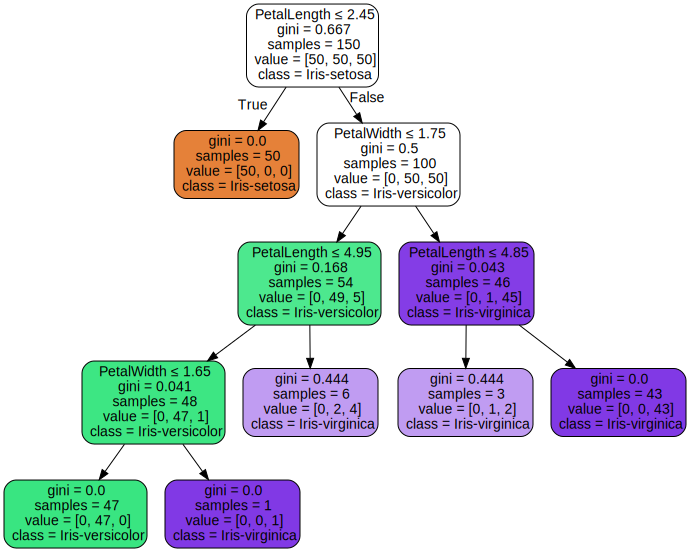

In [6]:
# View Tree
dot_data = export_graphviz(
    model, out_file=None, feature_names=features, 
    class_names=df['Name'].unique(), filled=True, 
    rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

# Save PDF
#graph.render("iris")
graph

## Regression

In [7]:
X,y = datasets.get_sin_data()

In [8]:
# Train
regr_1 = DecisionTreeRegressor(criterion='mse', max_depth=2)
regr_2 = DecisionTreeRegressor(criterion='mse', max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [9]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

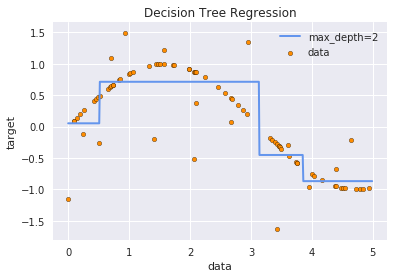

In [10]:
# Plot
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Sources

* http://scikit-learn.org/stable/modules/tree.html#classification
* http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
* http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html
* http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py